In [1]:
 # imports
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

In [2]:
multigraph = nx.read_weighted_edgelist(f'../out/g_32_RISJDR.ncol', create_using=nx.MultiDiGraph())


In [3]:

# create weighted graph from M
digraph = nx.DiGraph()

for u, v, data in multigraph.edges(data=True):
    w = data['weight']
    if digraph.has_edge(u,v):
        digraph[u][v]['weight'] += w
    else:
        digraph.add_edge(u, v, weight=w)


In [4]:
print(nx.info(multigraph))
print(nx.info(digraph)) 

Name: 
Type: MultiDiGraph
Number of nodes: 1303639
Number of edges: 9293316
Average in degree:   7.1287
Average out degree:   7.1287
Name: 
Type: DiGraph
Number of nodes: 1303639
Number of edges: 3241054
Average in degree:   2.4862
Average out degree:   2.4862


In [5]:
overall_reciprocity = nx.overall_reciprocity(multigraph)

In [6]:
overall_reciprocity

0.17429516009140333

In [7]:
reciprocity_all_nodes = nx.reciprocity(multigraph, multigraph.nodes())


In [8]:
def calc_p(graph, node_i, node_j):
    wij = graph[node_i][node_j]['weight']
    w_plus = graph.out_degree(node_i, weight='weight')
    return wij/w_plus
    

def reciprocity(graph, node_i, node_j):
    try:
        pij = calc_p(graph, node_i, node_j)
        pji = calc_p(graph, node_j, node_i)
    except (KeyError, ZeroDivisionError):
        return math.inf       
    
    ln = math.log
    
    # Ri j=|ln(pi j)−ln(pji)|\
    try:
        reciprocity = abs(ln(pij) - ln(pji))
    except ValueError:
        return math.inf
    return reciprocity

     



In [9]:
reciprocity_of_nodes = {}
all_reciprocities = []

for node in digraph.nodes():
    reciprocity_of_neighbors = {}
    for neighbor in digraph.neighbors(node):
        rec_i_j = reciprocity(digraph, node, neighbor)
        
        reciprocity_of_neighbors[neighbor] = rec_i_j
        if rec_i_j !=0 and rec_i_j != math.inf:
            all_reciprocities.append(rec_i_j)
    reciprocity_of_nodes[node] = reciprocity_of_neighbors

###### reciprocity_of_nodes

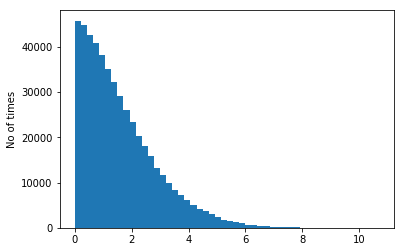

In [10]:
# Histogram of reciprocity

import matplotlib.pyplot as plt
import numpy as np

x = all_reciprocities
plt.hist(x, bins=50)
plt.ylabel('No of times')
plt.show()
